RAINFALL PREDICTOR DEV

In [11]:
# data manipulators
import pandas as pd
import numpy as np

# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample

# deep learning libraries
import seaborn as sns

# visualization libraries
import matplotlib.pyplot as plt

# data serialization
import pickle

# pretty print
from pprint import pprint

In [2]:
# data loading
raw_df = pd.read_csv(r'D:\Dsoft\Projects\ML\data\rainfall.csv')

In [3]:
# EDA
print("Shape:", raw_df.shape)
print("Info:")
print(raw_df.info())


Shape: (366, 12)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB
None


In [10]:
print("Description:")
print(raw_df.describe())
print("Missing Values:")
print(raw_df.isnull().sum())

Description:
              day     pressure     maxtemp  temparature     mintemp  \
count  366.000000   366.000000  366.000000   366.000000  366.000000   
mean    15.756831  1013.742623   26.191257    23.747268   21.894536   
std      8.823592     6.414776    5.978343     5.632813    5.594153   
min      1.000000   998.500000    7.100000     4.900000    3.100000   
25%      8.000000  1008.500000   21.200000    18.825000   17.125000   
50%     16.000000  1013.000000   27.750000    25.450000   23.700000   
75%     23.000000  1018.100000   31.200000    28.600000   26.575000   
max     31.000000  1034.600000   36.300000    32.400000   30.000000   

         dewpoint    humidity       cloud    sunshine  winddirection  \
count  366.000000  366.000000  366.000000  366.000000     365.000000   
mean    19.989071   80.177596   71.128415    4.419399     101.506849   
std      5.997021   10.062470   21.798012    3.934398      81.723724   
min     -0.400000   36.000000    0.000000    0.000000      

In [9]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB
None


In [ ]:
# data preprocessing

# Standardize column names
raw_df.columns = raw_df.columns.str.strip().str.lower().str.replace(' ', '_')

windfill = raw_df["winddirection"].mode()[0]  # Fill with mode
raw_df["winddirection"] = raw_df["winddirection"].fillna(windfill)

windspeed_fill = raw_df["windspeed"].median()  # Fill with median
raw_df["windspeed"] = raw_df["windspeed"].fillna(windspeed_fill)

raw_df = raw_df.drop(columns=['day'])


In [7]:
type(raw_df.columns.str)

pandas.core.strings.accessor.StringMethods

In [13]:
pprint(raw_df.columns.to_list())

['day',
 'pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'rainfall',
 'sunshine',
 'winddirection',
 'windspeed']


In [71]:
df = raw_df.copy()
df = df.drop(columns=['day'])
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [77]:
df["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [76]:
# NaN values
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [74]:
windfill = df["winddirection"].mode()[0]  # Fill with mode
df["winddirection"] = df["winddirection"].fillna(windfill)
windspeed_fill = df["windspeed"].median()  # Fill with median
df["windspeed"] = df["windspeed"].fillna(windspeed_fill)

In [75]:
median = df["winddirection"].median()
mean = df["winddirection"].mean()
mode = df["winddirection"].mode()
mean, median, mode[0]

(np.float64(101.28415300546447), np.float64(70.0), np.float64(20.0))


mean and median are close to each other we have uniform distribution/ normal distribution.     
mean and median are far away distribution is skewed

In [63]:

# Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [78]:
df["rainfall"] = df["rainfall"].map({'yes':1, 'no':0})
df


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [79]:
df.describe()


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


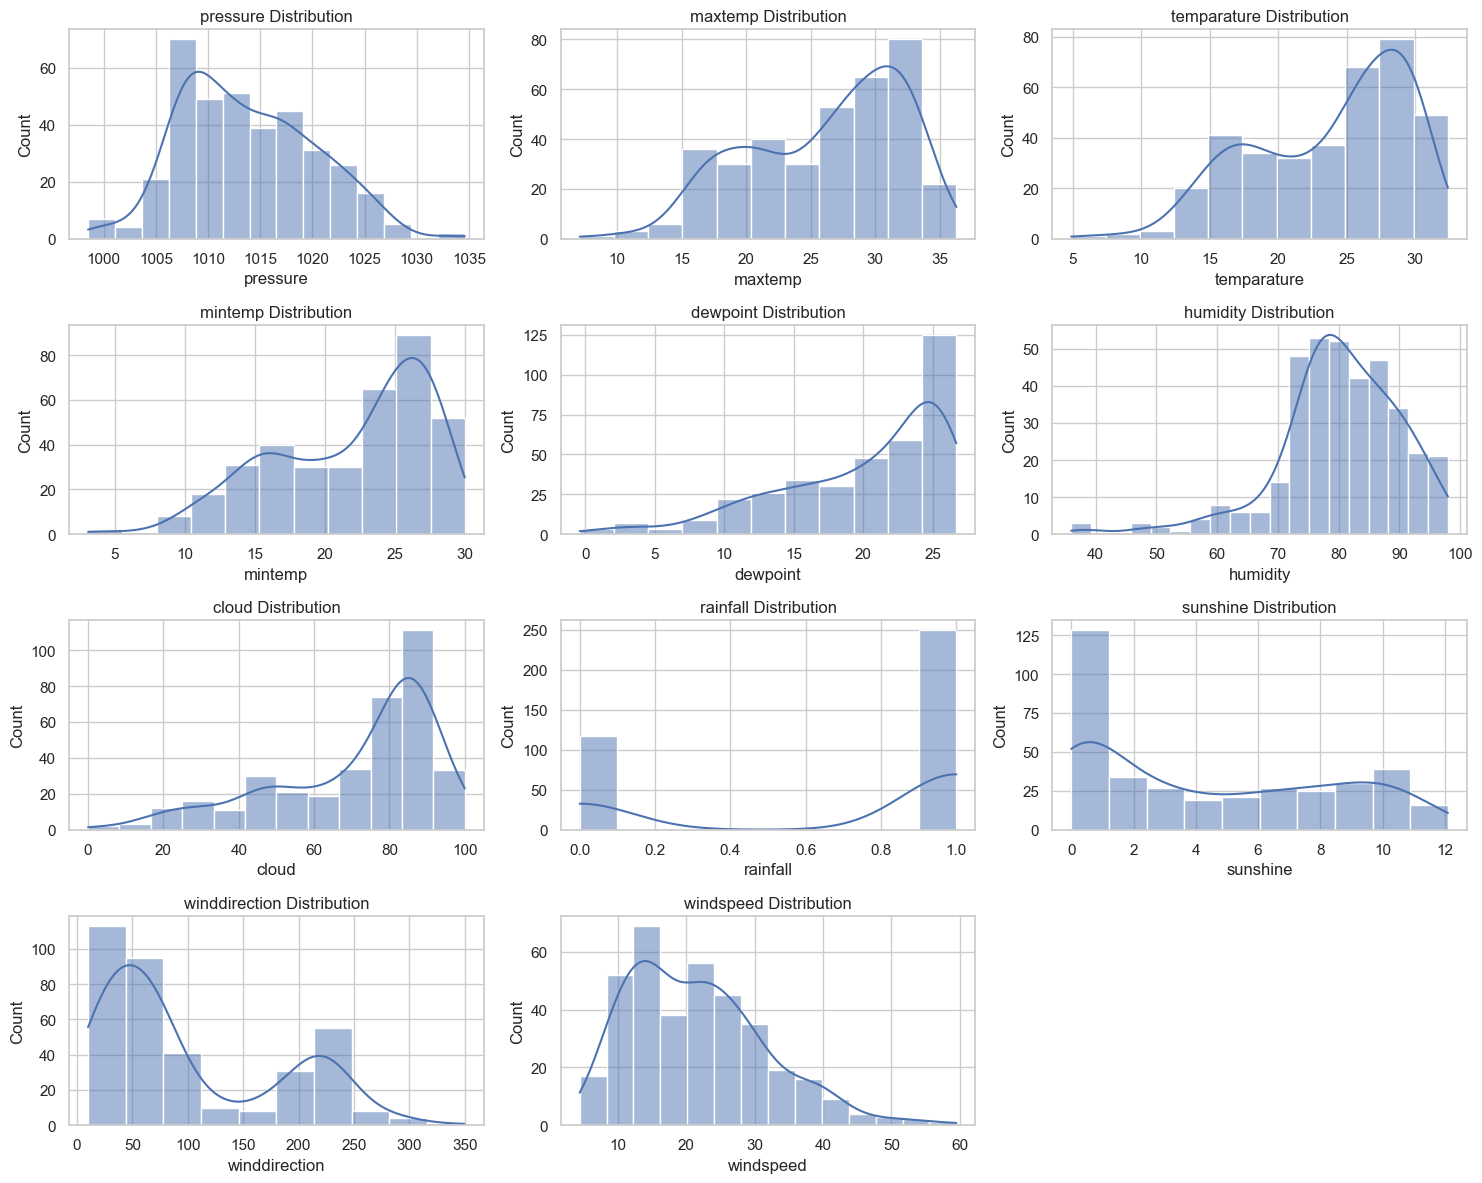

In [86]:
plt.figure(figsize=(15, 12))
li = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed']
for i, column in enumerate(li, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    sns.histplot(df[column], kde=True)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

C:\Users\16yas\AppData\Local\Temp\ipykernel_26000\4162196931.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rainfall', data=df, palette='Set2')


Text(0.5, 1.0, 'Rainfall Count')

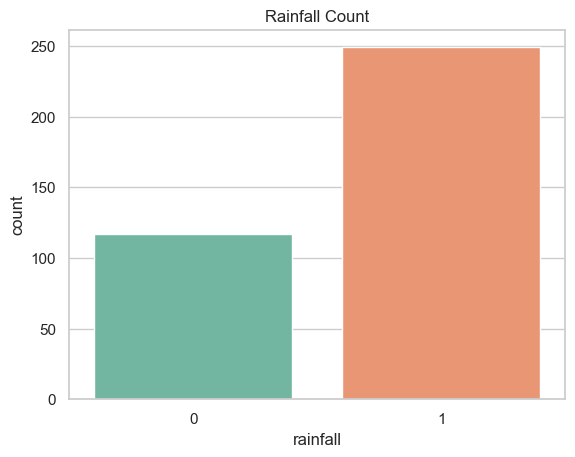

In [90]:
sns.countplot(x='rainfall', data=df, palette='Set2')
plt.title('Rainfall Count')

Categories are to be handles evely. above picture shows that the data contains imbalanced no for categories. which needs to be dealt with. for training the model. 

Use down sampling or other techniques for addressing the issue

Text(0.5, 1.0, 'Correlation Heatmap')

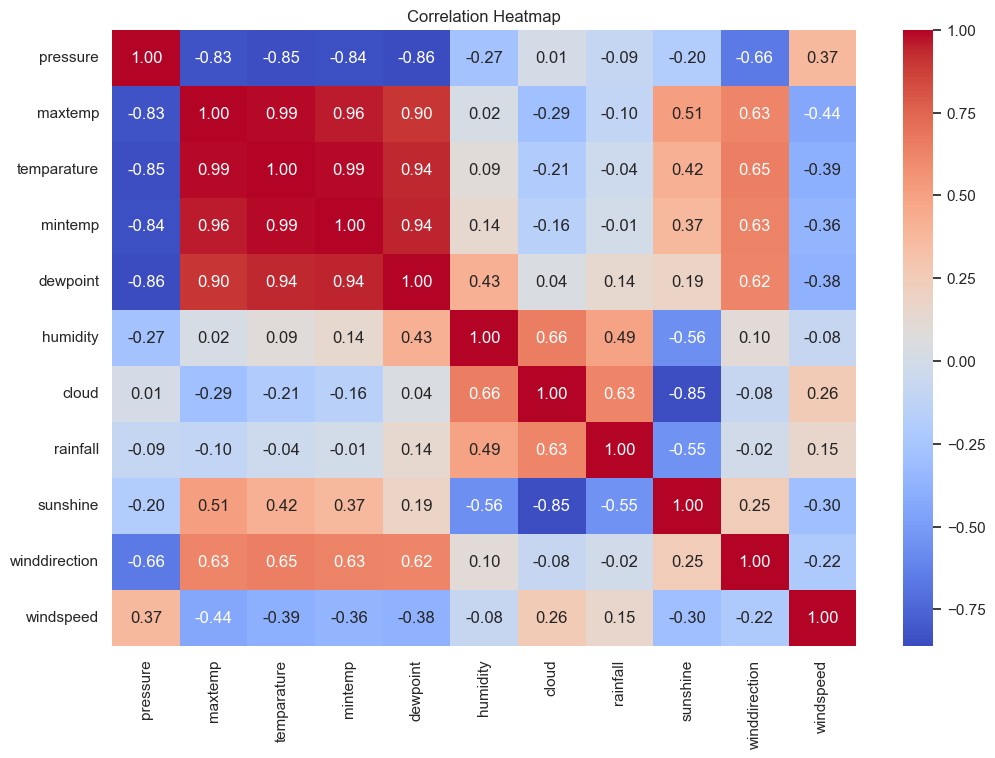

In [91]:
# coorrelation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')

Highly coorealted columns are indicated in red. ignore the cols becuase they might contribute the same for the outome

Use one column instead of four.
e.g. 'maxtemp', 'temparature', 'mintemp', 'dewpoint' are very highly coorelated. only using "maxtemp" column for now

Problems::

1. Class imbalance
2. Highly coorelated columns


In [96]:
# Identify highly correlated features (threshold > 0.85)
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Columns to ignore based on high correlation:", to_drop)

Columns to ignore based on high correlation: ['temparature', 'mintemp', 'dewpoint']


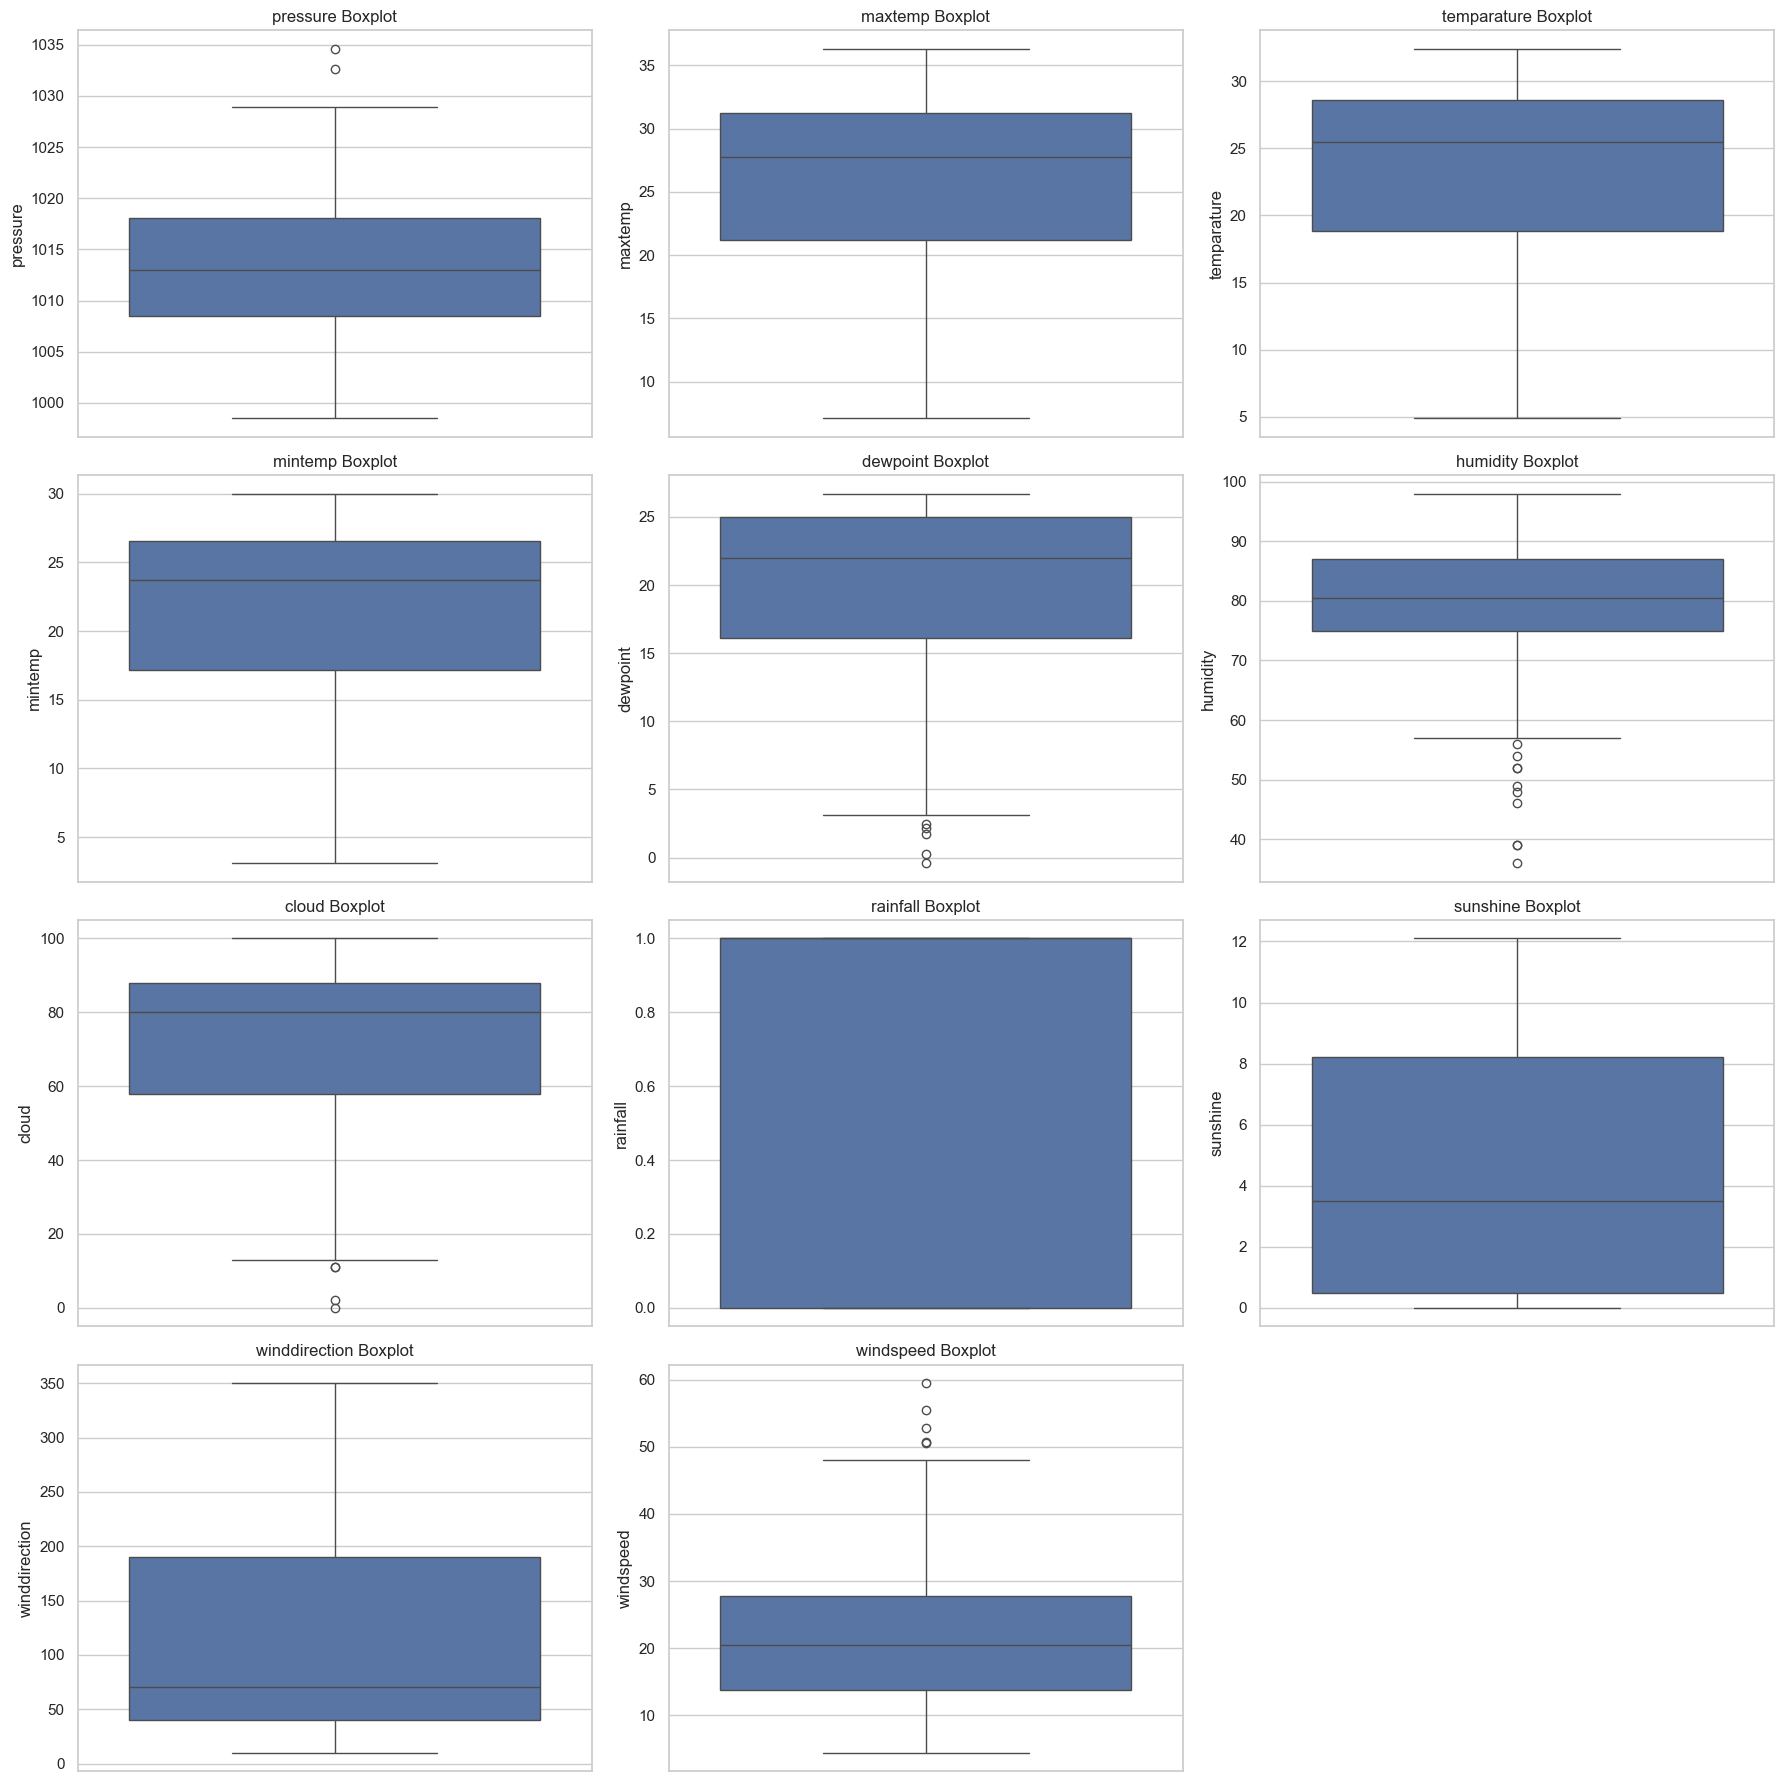

In [100]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

Easily identify outliers for the columns using boxplot. e.g. windspeed, humidity, cloud, pressure

In [108]:
df["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [110]:
## Downsampling
# Separate majority and minority classes
majority = df[df.rainfall == 1]
minority = df[df.rainfall == 0]

# Downsample majority class
majority_downsampled = resample(majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority),  # to match minority class
                                 random_state=42)  # reproducible results
majority_downsampled.shape

(117, 11)

In [112]:
df_downsampled = pd.concat([majority_downsampled, minority])
print("Downsampled Data Shape:", df_downsampled.shape)

# Shuffle the downsampled DataFrame
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
print("Shuffled Downsampled Data Shape:", df_downsampled.shape)

Downsampled Data Shape: (234, 11)
Shuffled Downsampled Data Shape: (234, 11)


In [113]:
df_downsampled

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,19.0,18.0,17.0,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,30.8,26.2,23.6,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,33.3,29.6,27.6,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,29.5,27.6,26.7,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,18.6,14.8,12.3,8.4,66,18,0,10.1,20.0,24.4
...,...,...,...,...,...,...,...,...,...,...,...
229,1008.1,30.7,28.1,26.3,25.4,86,75,1,5.7,20.0,9.5
230,1010.1,22.8,21.5,20.1,19.9,91,89,1,0.0,70.0,31.8
231,1020.6,17.6,16.1,14.6,14.7,91,88,1,0.3,50.0,24.4
232,1008.3,33.3,29.4,26.8,24.1,74,29,0,5.7,10.0,4.4


In [114]:
df_downsampled = df_downsampled.drop(columns=['maxtemp', 'temparature','mintemp'])

In [115]:
# Split the data into training and testing sets
X = df_downsampled.drop(columns=['rainfall'])
y = df_downsampled['rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)


In [117]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [118]:
# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=rf_model, # Initialize the model
    param_grid=param_grid_rf, # Hyperparameters to tune
    cv=5, 
    n_jobs=-1, # use all available cores. defines how many jobs to run in parallel
    # scoring='accuracy',
    verbose=2 # how the training process is displayed
)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.818918918918919


In [ ]:
grid_search_rf.best_estimator_
print("Best Estimator:", grid_search_rf.best_estimator_)
grid_search_rf.best_params_

Best Estimator: RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [122]:
grid_search_rf

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [124]:
best_rf_model = grid_search_rf.best_estimator_

MODEL EVALUATION

In [126]:
# Cross-validation scores
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))



Cross-Validation Scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean CV Score: 0.818918918918919


In [131]:
# test the model
y_pred = best_rf_model.predict(X_test)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("#" * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("#" * 100)
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 0.7446808510638298
####################################################################################################
Confusion Matrix:
 [[17  7]
 [ 5 18]]
####################################################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [133]:
best_rf_model.predict_proba(X_test)[:, 1]

array([0.95817316, 0.29993795, 0.59206494, 0.40024386, 0.18898404,
       0.44920829, 0.04181818, 0.60368398, 0.73959654, 0.43559041,
       0.09978827, 0.91866518, 0.56880674, 0.46968015, 0.97914286,
       0.29125853, 0.99006061, 0.89293687, 0.37891041, 0.07184265,
       0.74539918, 0.74820257, 0.57400234, 0.64923034, 0.10366206,
       0.93105128, 0.64199838, 0.14369853, 0.61028914, 0.51189194,
       0.08484848, 0.48996975, 0.10753886, 0.06980375, 0.11411579,
       0.82066889, 0.60562882, 0.60104224, 0.735282  , 0.55962181,
       0.12736732, 0.80682023, 0.30295157, 0.00363636, 0.58577178,
       0.58038339, 0.08729582])

1. SMOTE for class balancing
2. PCA for dimensionality reduction
3. Simpler models like with feature scaling
4. Model selction with hyperparameter tuning